In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
ticker=pd.read_csv('dowjones.csv')

In [3]:
ticker

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,MMM,MMM,MMM,MMM,MMM,MMM,MMM,MMM,MMM,MMM,UNH
1,AA,AA,AA,AXP,AXP,AXP,AXP,AXP,AXP,AXP,GS
2,AXP,AXP,AXP,T,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,HD
3,T,T,T,BA,BA,BA,BA,BA,BA,BA,MSFT
4,BAC,BAC,BAC,CAT,CAT,CAT,CAT,CAT,CAT,CAT,CRM
5,BA,BA,BA,CVX,CVX,CVX,CVX,CVX,CVX,CVX,MCD
6,CAT,CAT,CAT,CSCO,CSCO,CSCO,CSCO,CSCO,CSCO,CSCO,HON
7,CVX,CVX,CVX,KO,KO,KO,KO,KO,KO,KO,BA
8,CSCO,CSCO,CSCO,DD,DD,DD,DD,DD,DD,DOW,V
9,KO,KO,KO,XOM,XOM,XOM,XOM,XOM,XOM,XOM,AMGN


In [4]:
momentum_all=[]
for i in range(len(ticker.columns)-1):
    start_date = str(str(2010+i)+'-01-01')
    end_date = str(str(2010+i)+'-12-31')
    df = pdr.get_data_yahoo(ticker.iloc[0:29,i], start=start_date, end=end_date)['Adj Close']
    df.drop(labels=df.columns[df.isnull().any()].tolist(), axis='columns', inplace=True)
    df_return = df.pct_change()
    df_avg_annualreturn = df_return.mean()*250
    df_avg_annualreturn.sort_values(inplace=True, ascending=False)
    r_selected = df_avg_annualreturn[0:10]
    r_selected_ticker = r_selected.index
    start_date_2 = str(str(2011+i)+'-01-01')
    end_date_2 = str(str(2011+i)+'-12-31')
    df2 = pdr.get_data_yahoo(r_selected.index, start=start_date_2, end=end_date_2)['Adj Close']
    df2_return = df2.pct_change()
    df2_avg_annualreturn = df2_return.mean()*250
    W = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    momentum = np.dot(df2_avg_annualreturn,W)
    momentum_all.append(momentum)
momentum_all

/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'HPE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'UTX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'HPE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'UTX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'HPE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base

[0.1620780359425241,
 0.08304546039265626,
 0.2708556604670311,
 0.14883523742710922,
 0.13374386998038695,
 0.11445805076351273,
 0.18571252827964357,
 0.04118233603994703,
 0.2201350809582556,
 0.27576556701540444]

In [18]:
Dowjones = pdr.get_data_yahoo('^DJI', start='2011-01-01',end='2020-12-31')
Dowjones['Simple return']=Dowjones['Adj Close'].pct_change()
Dowjones.drop(labels=['High', 'Low','Open','Close','Volume'],axis='columns',inplace=True)
Dowjones['Year']=Dowjones.index.year
Dowjones.drop(labels=['Adj Close'],axis='columns',inplace=True)
R_Dow=Dowjones.groupby('Year').mean()*250
port=momentum_all
R_Dow['Momentum Strategy Portfolio Return']=port
R_Dow=R_Dow.rename(columns={'Simple return':'Dow Jones Simple Return'})
R_Dow

,Dow Jones Simple Return,Momentum Strategy Portfolio Return
Year,,
2011,0.067588,0.162078
2012,0.076937,0.083045
2013,0.238412,0.270856
2014,0.077792,0.148835
2015,-0.010606,0.133744
2016,0.132782,0.114458
2017,0.225166,0.185713
2018,-0.041812,0.041182
2019,0.207761,0.220135


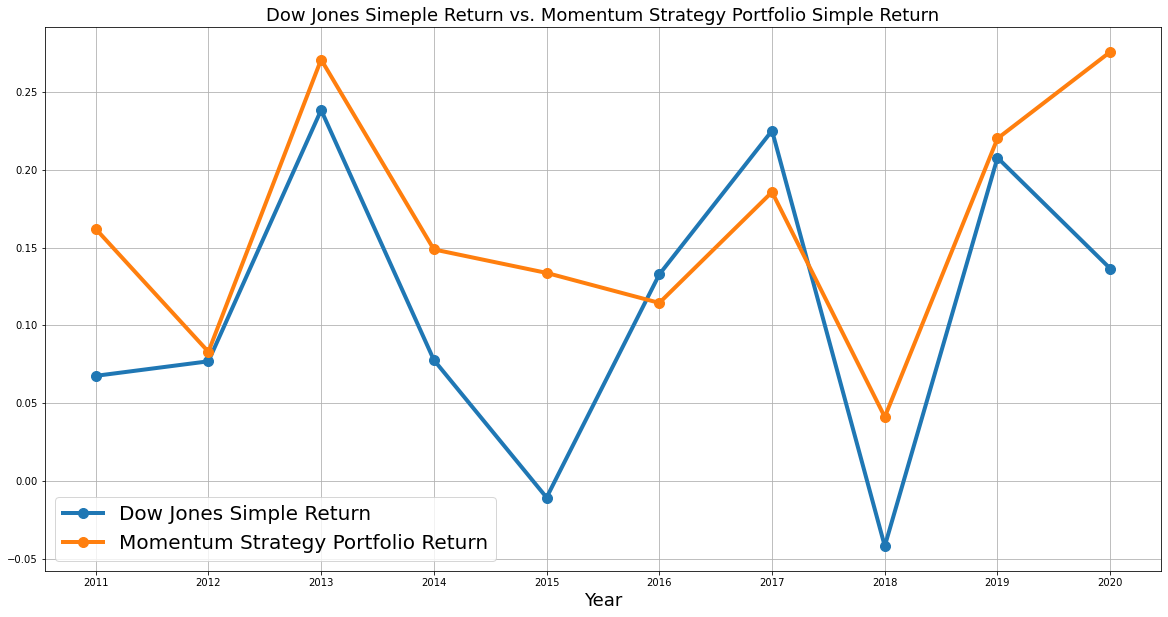

In [20]:
R_Dow[['Dow Jones Simple Return','Momentum Strategy Portfolio Return']].plot(figsize=(20, 10),  marker='o',markersize=10.0,linewidth=4.0)
plt.title('Dow Jones Simeple Return vs. Momentum Strategy Portfolio Simple Return', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.legend(prop={'size': 20})
plt.grid(True)
plt.xticks(R_Dow.index)
plt.show()